# Grafico Mod_dist vs Redshift.

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import log,sqrt
import scipy.special as sc  
from scipy.optimize import curve_fit

In [68]:
df = pd.read_csv('dati.csv')

In [69]:
df=df.drop('nome_SN',axis=1)

In [119]:
df=df.astype('float')
df['dist']=10**(0.2*df['mod_dist']+1)*10**-6 #(da modulo di distanza a Mpc)

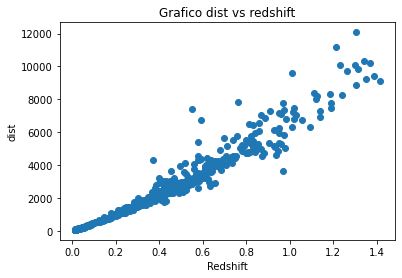

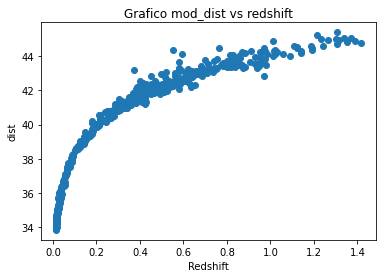

In [180]:
#plt.figure(figsize=(15,10),dpi = 1000)
plt.plot(df['redshift'],df['dist'],'o')
plt.title('Grafico dist vs redshift')
plt.xlabel('Redshift')
plt.ylabel('dist')
plt.show()

plt.plot(df['redshift'],df['mod_dist'],'o')
plt.title('Grafico mod_dist vs redshift')
plt.xlabel('Redshift')
plt.ylabel('dist')
plt.show()

CURVE FIT 25 + 5 LOG(dl(z))

In [129]:
# attraverso la funzione ipergeometrica di seconda specie trovo il valore della luminosità DL(z):
# b è il parametro da stimare ovvero omegaM. z è il redshift.
def geom_1(b):
    return sc.hyp2f1(1/6,1/2,7/6, (b - 1)/b)
def geom_2(b,z):
    return sc.hyp2f1(1/6,1/2,7/6, ((b - 1)/b) * (np.ones(len(z)) + z) ** -3)


In [130]:
# velocità della luce in km/s:
c = 300000
#Luminosità Dl(z):
def Dl(a,b,z):
     return ((c/a) * (2 * (np.ones(len(z)) + z))/np.sqrt(b)) * (np.ones(len(z))*2 * geom_1(b) - np.reciprocal(np.sqrt(np.ones(len(z)) + z)) * geom_2(b,z))
    
def Dl(a,b,z):
    return c/a * 2 * (np.ones(len(z))+z)/np.sqrt(b) * geom_1(b) - np.reciprocal(np.sqrt(np.ones(len(z))+z)) * geom_2(b,z)

In [168]:
def Dl(a,b,z):
    cosmo=FlatLambdaCDM(H0=a, Om0=b)
    return cosmo.luminosity_distance(z).to_value()

In [77]:
# definisco la funzione i cui parametri verranno minimizzati attraverso il metodo dei minimi quadrati:

In [178]:
def model(x, A, B):
    return (25 + 5 * np.log10(Dl(A,B,x)))

In [79]:
# continuare con il curve fit, non so perché ma c'è un problema nella conversione delle colonne della tabelle in float...

In [173]:
xdata,ydata,sigmas = (df['redshift'],df['mod_dist'],df['mod_dist_err'])

In [138]:
xdata=xdata.to_numpy()
ydata=ydata.to_numpy()

In [139]:
xdata=list(xdata)
ydata=list(ydata)

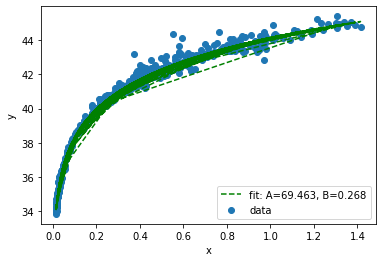

In [179]:
plt.scatter(x=xdata, y=ydata, label='data')
popt, pcov = curve_fit(model, xdata, ydata, p0=[69, 0.3],maxfev=10000,bounds=([60,0.2],[80,0.6]))
# print('fit without bounds')
# print(popt)
# print(pcov)
# print("A = {:.3f}+/-{:.3f}".format(popt[0],np.sqrt(pcov[0,0])))
# print("B = {:.3f}+/-{:.3f}".format(popt[1],np.sqrt(pcov[1,1])))

# plt.plot(xdata, model(xdata, *popt), 'r-',
#          label='fit: A={:5.3f}, B={:5.3f}'.format(*popt))
# popt, pcov = curve_fit(model, xdata, ydata, sigma=sigmas, p0=[69, 0], bounds=([0, 0], [3., 1.]), absolute_sigma=True)
# print('fit with bounds')
# print("fit parameters: ", popt)
# print("cov matrix:", pcov)

plt.plot(xdata, model(xdata, *popt), 'g--',
         label='fit: A=%5.3f, B=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()